# Machine Learning Final Exam Project
## Calista Lianardi - 2702325880 - LE09
## 3. Game Recommendation System

In [302]:
#Importing Important Libraries

#Basic EDA Library
import pandas as pd
import numpy as np

#Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Machine Learning Model
from sklearn.neighbors import NearestNeighbors

# Remove warnings
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### 3.A. Exploratory Data Analysis

#### <span style='color:blue'>Data Preprocessing</span>

In [303]:
df3 = pd.read_csv('3A.tsv', sep = '\t')
df3.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN


In [304]:
#checking the dataset summary
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

In [305]:
#Summarry statistics 
df3.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,16928.000000
mean,8463.500000,1974.215147,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,-195.792120
std,4886.837014,252.128480,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,545.393536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1000.000000
25%,4231.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,-538.000000
50%,8463.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,-82.000000
75%,12695.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,21.000000
max,16927.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [306]:
# Check for missing values
df3.isnull().sum()

index                 0
Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         6769
User_Count            0
Developer          6688
Rating             6836
dtype: int64

In [307]:
# Calculate the percentage of missing values in each column
missing_percentage = df3.isnull().sum() / len(df3) * 100

# Display the percentage of missing values for each column
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
index               0.000000
Name                0.011815
Platform            0.000000
Year_of_Release     0.000000
Genre               0.011815
Publisher           0.324905
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.205104
Critic_Count       51.205104
User_Score         39.987004
User_Count          0.000000
Developer          39.508507
Rating             40.382798
dtype: float64


There are 5 columns with more than 20% missing values. Theoretically, columns with more than 20% missing data are often considered candidates for deletion, as the high proportion of missing values may hinder effective analysis, thus let's just drop that column first before proceeding and imputing the missing value from other valuable column. 

exception for User_Count column where there are much of missing value and bunch of more than 2000 tbd value which we cannot also impute and make the column non-numerical, this information would be valuable for our user to determine which game they want to play based on our recommendation system! TBD value are common things happen!

In [308]:
#Dropping unneccessary column (Critic_Score, Critic_Count, Developer, & Rating)

df3 = df3.drop(columns = ['Critic_Score', 'Critic_Count', 'Developer', 'Rating'])
df3.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,User_Count
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,322.0
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,-706.0
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,709.0
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,192.0
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,-92.0


In [309]:
#Drop rows where missing value exist in column Name, Genre, and Publisher

df3 = df3.dropna(subset=['Name', 'Genre', 'Publisher', 'User_Score'])
df3.isnull().sum()

index              0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Score         0
User_Count         0
dtype: int64

In [310]:
#Checking unique value in each categorical cols

df3_cat = df3.select_dtypes(include=['object']).columns

for i in df3_cat:
    print(df3[i].value_counts())
    print()

Name
Madden NFL 07                              10
LEGO Star Wars II: The Original Trilogy     9
Need for Speed: Most Wanted                 9
LEGO Jurassic World                         9
Angry Birds Star Wars                       8
                                           ..
RalliSport Challenge 2                      1
Pac-Pix                                     1
Sing Party                                  1
Wave Rally                                  1
15 Days                                     1
Name: count, Length: 6114, dtype: int64

Platform
PS2     1500
DS      1278
X360    1066
Wii     1016
PS3      988
PC       822
XB       744
PSP      549
GBA      531
GC       475
PS4      266
3DS      235
PS       212
XOne     198
PSV      151
WiiU     106
DC        14
Name: count, dtype: int64

Genre
Action          2236
Sports          1542
Shooter         1042
Misc             901
Racing           886
Role-Playing     784
Simulation       584
Platform         578
Adventure        

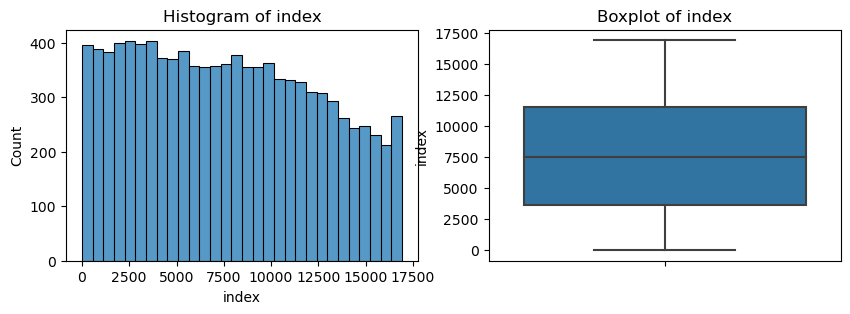

Skewness index: 0.17227522873766027
Kurtosis index: -1.092215700035542


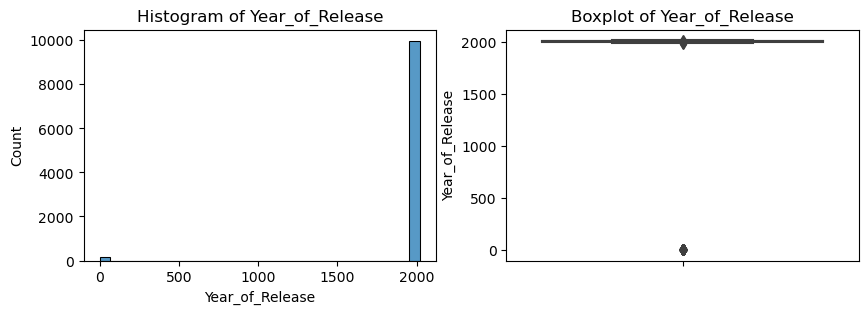

Skewness Year_of_Release: -7.461063105468328
Kurtosis Year_of_Release: 53.692990808081184


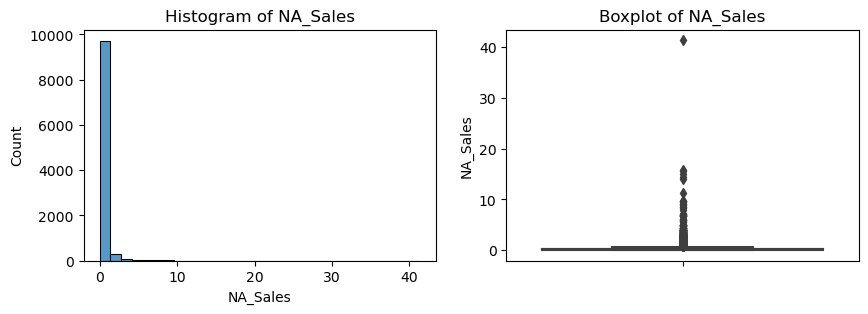

Skewness NA_Sales: 18.242867091089202
Kurtosis NA_Sales: 691.867614313448


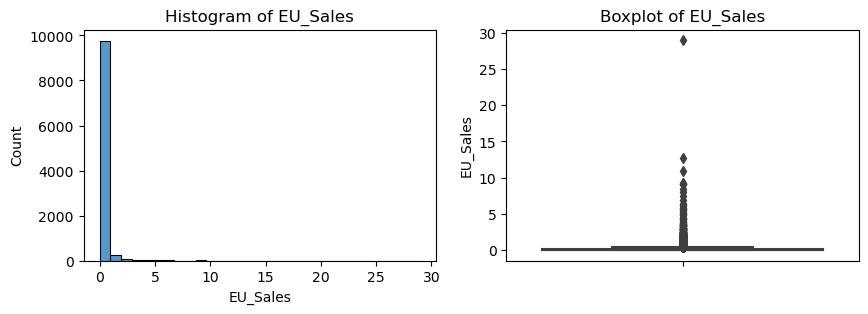

Skewness EU_Sales: 18.204660026628662
Kurtosis EU_Sales: 668.5308046586102


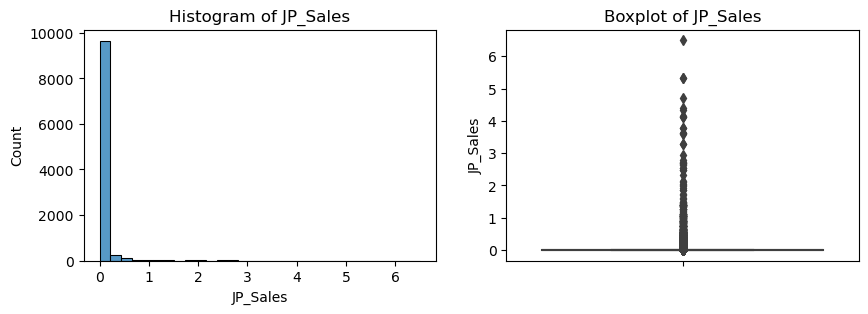

Skewness JP_Sales: 12.480664721067896
Kurtosis JP_Sales: 210.45234074303448


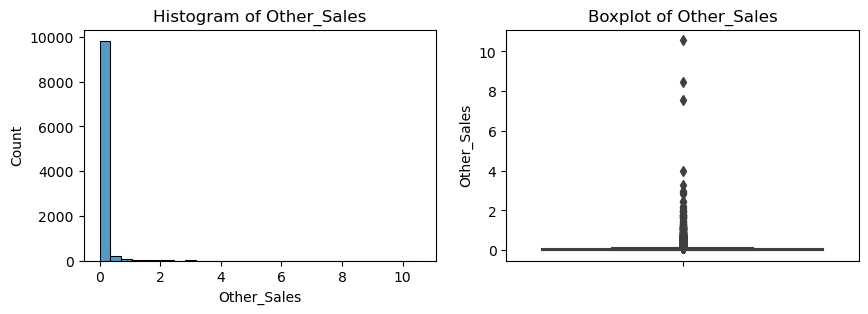

Skewness Other_Sales: 21.70200265312583
Kurtosis Other_Sales: 779.213514239048


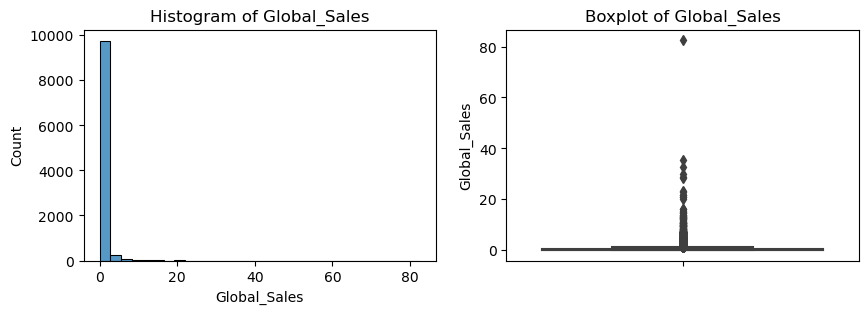

Skewness Global_Sales: 18.27025062695335
Kurtosis Global_Sales: 669.978234411491


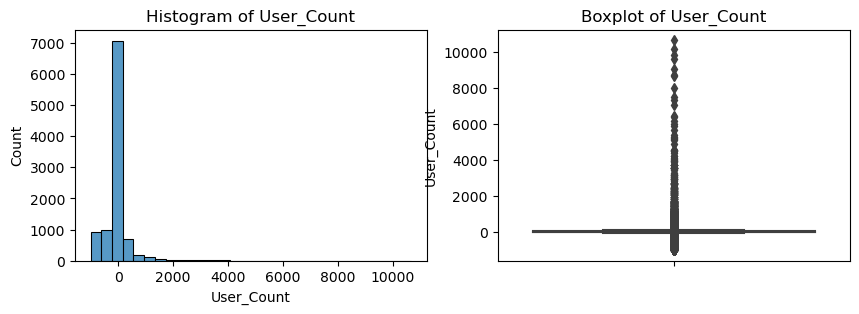

Skewness User_Count: 6.4132760205600166
Kurtosis User_Count: 79.2616786075061


In [311]:
#Evaluating distribution and outlier to impute the missing value

#Taking the numerical column
df3_num = df3.select_dtypes(include=['float64', 'int64']).columns

def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title(f'Histogram of {i}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title(f'Boxplot of {i}')

        plt.show()

        print(f'Skewness {i}:', df[i].skew())
        print(f'Kurtosis {i}:', df[i].kurt())

check_distribution_outliers(df3, df3_num)

### 3.B. Building the Content Based Recommender System

#### <span style='color:blue'> Processing the MetaData </span>

In [312]:
df3['Metadata'] = (
    df3['Genre'] 
    + ' ' 
    + df3['Platform'] 
    + ' '
    + df3['Publisher']
    + ' '
    + df3['Year_of_Release'].astype(str)
)

In [313]:
df3.iloc[0]['Metadata']

'Sports Wii Nintendo 2006'

In [314]:
test_df = df3[['Name', 'Metadata']]
test_df.head()

,Name,Metadata
0,Wii Sports,Sports Wii Nintendo 2006
2,Mario Kart Wii,Racing Wii Nintendo 2008
3,Wii Sports Resort,Sports Wii Nintendo 2009
6,New Super Mario Bros.,Platform DS Nintendo 2006
7,Wii Play,Misc Wii Nintendo 2006


#### <span style='color:blue'> Extracting the Feature </span>

In [315]:
#Using Count Vectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df3['Metadata'])

#Inspect the vocabulary or the matrix
# print("Vocabulary:", count.get_feature_names_out())
# print("Feature Matrix (Count):\n", count_matrix.toarray())

In [316]:
#Computing cosine similarity based on vectorized metadata
#This are to measure how similar each feature with value range from 0 - 1

similarity = cosine_similarity(count_matrix, count_matrix)
# similarity

#### <span style='color:blue'> Deployment </span>

In [320]:
#Building the fucntion
#Based on every content available in the database

def recommend_me(feature, value):
    if feature not in df3.columns:
        return f"Feature '{feature}' not found in the database. Try another one perhaps? Try: Name, Genre, Platform, Publisher, Year_of_Release"
    
    if value not in df3[feature].values:
        return f"No match found in our database for '{value}' in feature '{feature}'. Try another one perhaps? Try: Capitalized your first word"
    
    filtered_df = df3[df3[feature] == value]
    
    if filtered_df.empty:
        return f"No games found with {feature} = '{value}'."
    
    idx = filtered_df.index[0]
    
    distances = sorted(list(enumerate(similarity[idx])), reverse = True, key= lambda x: x[1])
    
    sim_indices = [i[0] for i in distances[1:6]]
    
    return df3.iloc[sim_indices][['Name', 'Genre', 'Platform', 'Year_of_Release', 'User_Score']]

In [322]:
#Testing
recommend_me('Name', 'Wii Sports')

,Name,Genre,Platform,Year_of_Release,User_Score
7184,Super Swing Golf,Sports,Wii,2006,7.8
3,Wii Sports Resort,Sports,Wii,2009,8
7,Wii Play,Misc,Wii,2006,6.6
13,Wii Fit,Sports,Wii,2007,7.7
15,Wii Fit Plus,Sports,Wii,2009,7.4


### 3.C. Function Evaluation

#### <span style='color:blue'> Testing </span>

In [323]:
#1st Input Test

recommend_me('Name', 'Wii Sports')

,Name,Genre,Platform,Year_of_Release,User_Score
7184,Super Swing Golf,Sports,Wii,2006,7.8
3,Wii Sports Resort,Sports,Wii,2009,8
7,Wii Play,Misc,Wii,2006,6.6
13,Wii Fit,Sports,Wii,2007,7.7
15,Wii Fit Plus,Sports,Wii,2009,7.4


In [324]:
#2nt Input Test

recommend_me('Genre', 'Shooter')

,Name,Genre,Platform,Year_of_Release,User_Score
1014,Crackdown,Shooter,X360,2007,8
64,Halo: Reach,Shooter,X360,2010,7.9
66,Halo 4,Shooter,X360,2012,7
117,Gears of War 2,Shooter,X360,2008,7.7
134,Halo 3: ODST,Shooter,X360,2009,7.1


In [325]:
#3rd Input Test

recommend_me('Platform', 'PS2')

,Name,Genre,Platform,Year_of_Release,User_Score
3969,Goldeneye 007: Reloaded,Shooter,X360,2011,6
6343,Gun,Shooter,X360,6,7.5
32,Call of Duty: Black Ops,Shooter,X360,2010,6.3
35,Call of Duty: Black Ops II,Shooter,X360,2012,4.8
36,Call of Duty: Modern Warfare 2,Shooter,X360,2009,6.3


In [330]:
#4th Input Test

recommend_me('Year_of_Release', 2001)

,Name,Genre,Platform,Year_of_Release,User_Score
5252,Trauma Center: Under the Knife,Simulation,DS,2005,8.7
11,Mario Kart DS,Racing,DS,2005,8.6
19,Brain Age: Train Your Brain in Minutes a Day,Misc,DS,2005,7.9
26,Brain Age 2: More Training in Minutes a Day,Puzzle,DS,2005,7.1
123,Big Brain Academy,Misc,DS,2005,7.4


In [331]:
#Wrong Input Simulation #2

recommend_me('name', 'Wii')

"Feature 'name' not found in the database. Try another one perhaps? Try: Name, Genre, Platform, Publisher, Year_of_Release"

In [333]:
#Wrong Input Simulation #2

recommend_me('Name', 'Action')

"No match found in our database for 'Action' in feature 'Name'. Try another one perhaps? Try: Capitalized your first word"

In [334]:
#User Input Simulation

print("Welcome to game recommendation system!")
print()

game_feature = input('What Do You Want To Search From? Ex: Name or Genre: ')
game_name = input(f'Input the {game_feature} name:' )

recommend_me(game_feature, game_name)

Welcome to game recommendation system!

What Do You Want To Search From? Ex: Name or Genre: Name
Input the Name name:Wii Sports


,Name,Genre,Platform,Year_of_Release,User_Score
7184,Super Swing Golf,Sports,Wii,2006,7.8
3,Wii Sports Resort,Sports,Wii,2009,8
7,Wii Play,Misc,Wii,2006,6.6
13,Wii Fit,Sports,Wii,2007,7.7
15,Wii Fit Plus,Sports,Wii,2009,7.4


#### <span style='color:blue'> Evaluation </span>

###### The recommendation system was tested with multiple input scenarios, including valid queries, wrong inputs, and a user input simulation. Here's the evaluation based on the observed results:

**1. Valid Input Tests**

The system performed well with valid inputs, providing meaningful recommendations across different features (Name, Genre, Platform, Year_of_Release). For Input Test 1 (Name: Wii Sports), the system correctly returned games similar to "Wii Sports" such as "Wii Sports Resorts, "Wii Fit Plus". For Input Test 2 (Genre: Shooter), the system returned a list of shooter games, such as "Crackdown," "Halo 4," and "Gears of War 2." This confirms its capability to recommend games based on genre effectively. For Input Test 3 (Platform: 'PS2'), While the recommendations for "PS2" included games from other platforms (e.g., "X360"), this might indicate a limitation in filtering strictly by platform. Despite this, the system correctly identified shooter games commonly associated with multi-platform releases. For Input Test 4 (Year_of_Release: 2001), The system provided recommendations for 2001, such as "Trauma Center: Under the Knife" and "Mario Kart DS." These recommendations matched the release period but included games released in subsequent years, suggesting a potential need for stricter filtering by year.

**2. Wrong Input Handling**

The system gracefully handled invalid or unexpected inputs, seen by Case 1 (Feature: 'name'), The system returned a clear error message: "Feature 'name' not found in the database." This suggests robust input validation for feature names, with helpful guidance on valid feature options. And from Case 2 (Name: 'Action') The system identified that no match was found for "Action" in the Name feature and suggested capitalizing the input. This shows thoughtful error handling, guiding the user to adjust their input.

**3. User Input Simulation**

The user input simulation demonstrated a smooth workflow:
The system prompted the user to specify a feature (e.g., Name or Genre) and then input a corresponding query.
The recommendations for "Wii Sports" were relevant, consistent with earlier tests, and presented clearly.
The interactive design ensures a user-friendly experience.

**Strengths**

1. Accurate Recommendations: The system successfully recommends relevant games based on input queries, demonstrating strong content-based filtering.
2. Error Handling: Invalid inputs are managed gracefully with descriptive error messages, ensuring the system remains intuitive for users.
3. Flexibility: The ability to search by multiple features (Name, Genre, Platform, Year_of_Release) provides versatility.
4. User Interaction: The interactive input simulation highlights a user-centric design, allowing for straightforward navigation.

**Weaknesses and Areas for Improvement**

1. Platform Filtering: Recommendations for Platform: 'PS2' included games from other platforms. Adding stricter filters or weights could improve specificity.
2. Year Matching: Recommendations for Year_of_Release included games from nearby years. Implementing exact matches or year bins (e.g., "2000-2005") could improve relevance.
3. Case Sensitivity: Queries such as name: 'wii' fail due to case sensitivity. Adding input normalization (e.g., converting all inputs to lowercase) could improve usability.

**Overall**

The recommendation system is robust, accurate, and user-friendly. It effectively handles valid inputs, provides meaningful recommendations, and gracefully manages invalid queries. Enhancements in filtering (e.g., stricter platform or year constraints) and input normalization could further refine its functionality. Overall, the system demonstrates excellent potential for real-world applications in game recommendation.